In [23]:
import pandas as pd

In [5]:

df = pd.read_csv("US_Accidents_Dec21_updated.csv")
df = df.query("County == 'Los Angeles'")
df.to_csv('LA_county_accidents.csv')

In [84]:
import datetime
import numpy as np
import calendar
import matplotlib.pyplot as plt

df_Boulder = pd.read_csv("Crashes.csv")
df_Boulder['date_in_dt'] = pd.to_datetime(df_Boulder['date']).dt.date
date_mask1 = (df_Boulder['date_in_dt'] >= datetime.date(2016,1,1))
df_Boulder = df_Boulder.loc[date_mask1]

df_Boulder['Year'] = pd.DatetimeIndex(df_Boulder['date']).year.astype('Int64')
df_Boulder['Month'] = pd.DatetimeIndex(df_Boulder['date']).month.astype('Int64')
df_Boulder_year = df_Boulder.groupby(["Year"]).size()
df_Boulder_month = df_Boulder.groupby(["Month"]).size()
df_Boulder['Hour'] = pd.DatetimeIndex(df_Boulder['date']).hour.astype('Int64')
df_Boulder_hour = df_Boulder.groupby(["Hour"]).size()
df_Boulder['Weekday'] = pd.to_datetime(df_Boulder['date']).dt.weekday
df_Boulder_weekday = df_Boulder.groupby(["Weekday"]).size()

df_Boulder.loc[((pd.to_datetime(df_Boulder['date']).dt.month >= 6) & (pd.to_datetime(df_Boulder['date']).dt.month <=8)),"Season"]="Summer"
df_Boulder.loc[((pd.to_datetime(df_Boulder['date']).dt.month == 6) | ((pd.to_datetime(df_Boulder['date']).dt.month <=2) & (pd.to_datetime(df_Boulder['date']).dt.month >=1))),"Season"]="Winter"
df_Boulder.loc[((pd.to_datetime(df_Boulder['date']).dt.month >=9) & (pd.to_datetime(df_Boulder['date']).dt.month <=11)),"Season"]="Fall"
df_Boulder.loc[((pd.to_datetime(df_Boulder['date']).dt.month >=2) & (pd.to_datetime(df_Boulder['date']).dt.month <=4)),"Season"]="Spring"
df_Boulder_season = df_Boulder.groupby(["Season"]).size()

df_Boulder.loc[((df_Boulder['lighting']=="DARK-LIGHTED")|(df_Boulder['lighting']=="DARK-UNLIGHTED") | (df_Boulder['lighting']=="DAWN OR DUSK") | (df_Boulder['lighting']=="UNKNOWN")),"Day_Night"]="Night"
df_Boulder.loc[(df_Boulder['lighting']=="DAYLIGHT"),"Day_Night"]="Day"
df_Boulder_daynight = df_Boulder.groupby(["Day_Night"]).size()

pop_Boulder = 329543 #population of Boulder county

df_LA = pd.read_csv("LA_county_accidents.csv")
df_LA['Start_Time_in_dt'] = pd.to_datetime(df_LA['Start_Time']).dt.date
date_mask2 = (df_LA['Start_Time_in_dt'] <= datetime.date(2020,12,31))
df_LA = df_LA.loc[date_mask2]

df_LA['Year'] = pd.DatetimeIndex(df_LA['Start_Time']).year.astype('Int64')
df_LA['Month'] = pd.DatetimeIndex(df_LA['Start_Time']).month.astype('Int64')
df_LA_year = df_LA.groupby(["Year"]).size()
df_LA_month = df_LA.groupby(["Month"]).size()
df_LA['Hour'] = pd.DatetimeIndex(df_LA['Start_Time']).hour.astype('Int64')
df_LA_hour = df_LA.groupby(["Hour"]).size()
df_LA['Weekday'] = pd.to_datetime(df_LA['Start_Time']).dt.weekday
df_LA_weekday = df_LA.groupby(["Weekday"]).size()

df_LA.loc[((pd.to_datetime(df_LA['Start_Time']).dt.month >= 6) & (pd.to_datetime(df_LA['Start_Time']).dt.month <=8)),"Season"]="Summer"
df_LA.loc[((pd.to_datetime(df_LA['Start_Time']).dt.month == 6) | ((pd.to_datetime(df_LA['Start_Time']).dt.month <=2) & (pd.to_datetime(df_LA['Start_Time']).dt.month >=1))),"Season"]="Winter"
df_LA.loc[((pd.to_datetime(df_LA['Start_Time']).dt.month >=9) & (pd.to_datetime(df_LA['Start_Time']).dt.month <=11)),"Season"]="Fall"
df_LA.loc[((pd.to_datetime(df_LA['Start_Time']).dt.month >=2) & (pd.to_datetime(df_LA['Start_Time']).dt.month <=4)),"Season"]="Spring"
df_LA_season = df_LA.groupby(["Season"]).size()

df_LA_daynight = df_LA.groupby(["Civil_Twilight"]).size()

pop_LA = 9830000 #population of LA county




/var/folders/pb/mwf_42056317rfgvk6y3t0t40000gn/T/ipykernel_82949/208302030.py:6: DtypeWarning: Columns (33,58,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Boulder = pd.read_csv("Crashes.csv")


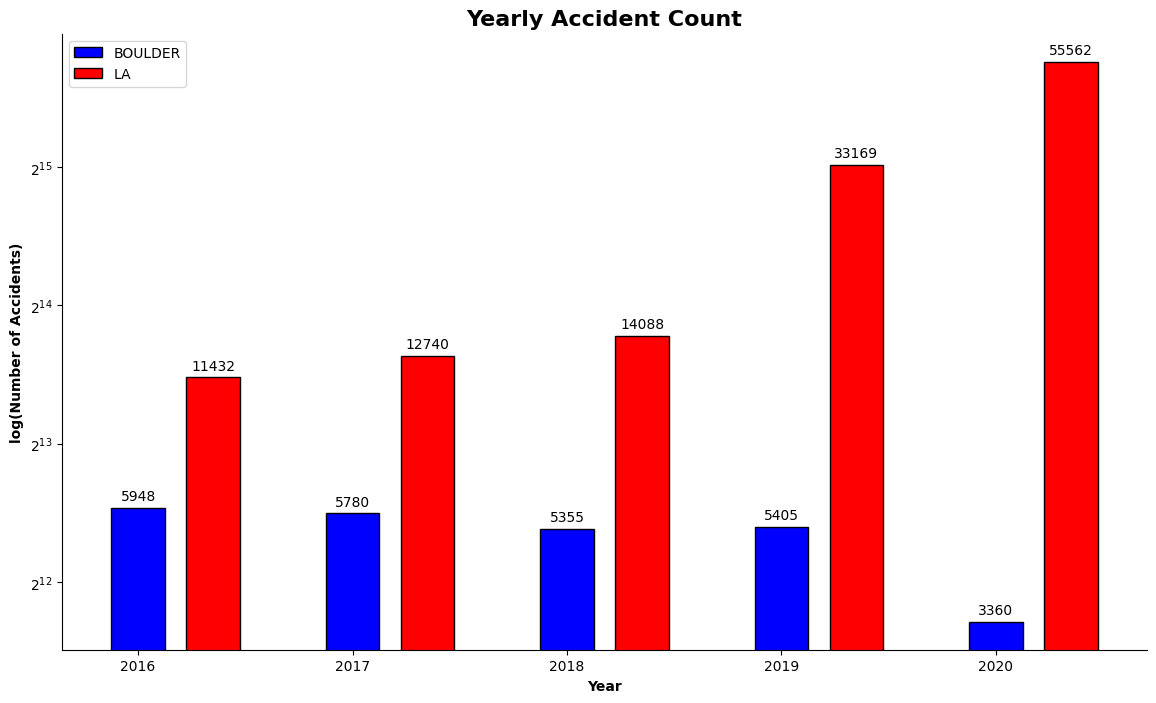

In [86]:

bars_year_boulder = df_Boulder_year.values
bars_year_la = df_LA_year.values
barWidth = 0.25
r1 = np.arange(len(bars_year_boulder))
r2 = [x + barWidth +0.1 for x in r1]

# Make the plot
plt.rcParams["figure.figsize"]=[14, 8]
rects = plt.bar(r1, bars_year_boulder, color='blue', width=barWidth, edgecolor='black', label='BOULDER')
rects2 = plt.bar(r2, bars_year_la, color='red', width=barWidth, edgecolor='black', label='LA')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars_year_boulder))],df_Boulder_year.index.get_level_values('Year').unique())
plt.title('Yearly Accident Count', fontsize=16, fontweight = 'bold')
# Create legend & Show graphic
plt.legend()
plt.xlabel("Year",fontweight='bold')
plt.ylabel("log(Number of Accidents)",fontweight='bold')

plt.yscale('log',base=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)
autolabel(rects2)

plt.show()


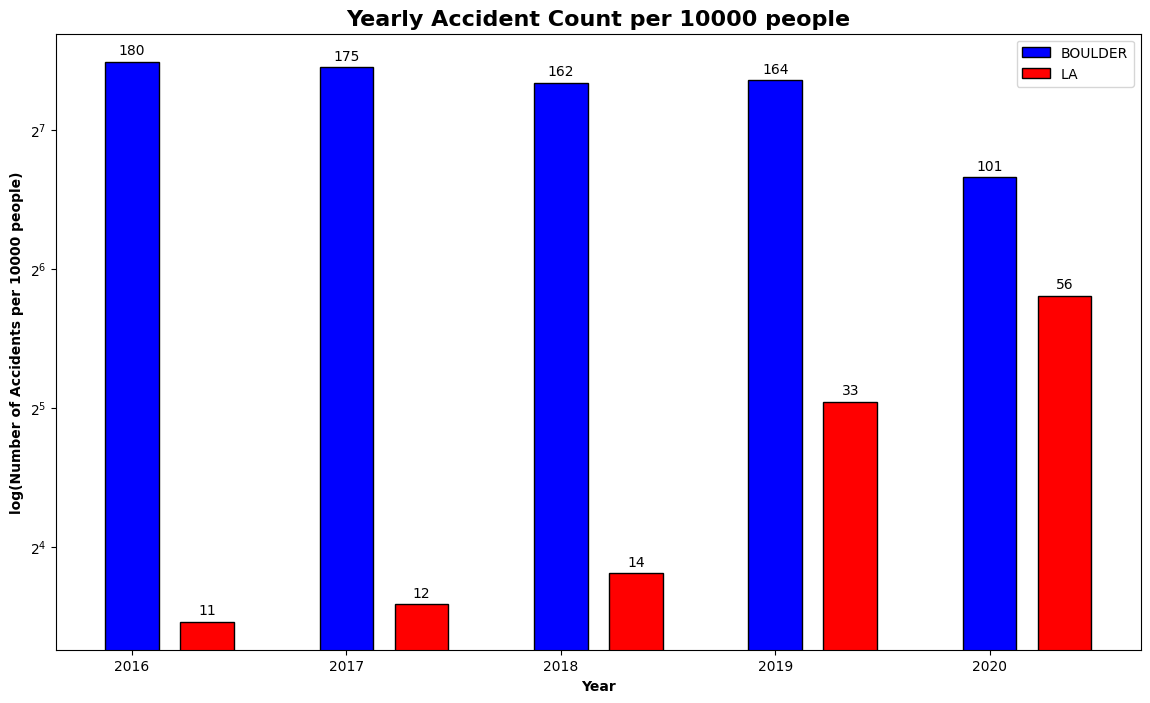

In [7]:
import math 

vector = np.vectorize(math.floor)
bars_year_boulder = (df_Boulder_year.values/pop_Boulder)*10000
bars_year_la = (df_LA_year.values/pop_LA)*10000
bars_year_boulder = vector(bars_year_boulder)
bars_year_la = vector(bars_year_la)

# bars_year_boulder = df_Boulder_year.values
# bars_year_la = df_LA_year.values

r1 = np.arange(len(bars_year_boulder))
r2 = [x + barWidth +0.1 for x in r1]

# Make the plot
plt.rcParams["figure.figsize"]=[14, 8]
rects = plt.bar(r1, bars_year_boulder, color='blue', width=barWidth, edgecolor='black', label='BOULDER')
rects2 = plt.bar(r2, bars_year_la, color='red', width=barWidth, edgecolor='black', label='LA')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars_year_boulder))],df_Boulder_year.index.get_level_values('Year').unique())
plt.title('Yearly Accident Count per 10000 people', fontsize=16, fontweight = 'bold')
# Create legend & Show graphic
plt.legend()
plt.xlabel("Year",fontweight='bold')
plt.ylabel("log(Number of Accidents per 10000 people)",fontweight='bold')

plt.yscale('log',base=2)
autolabel(rects)
autolabel(rects2)

plt.show()


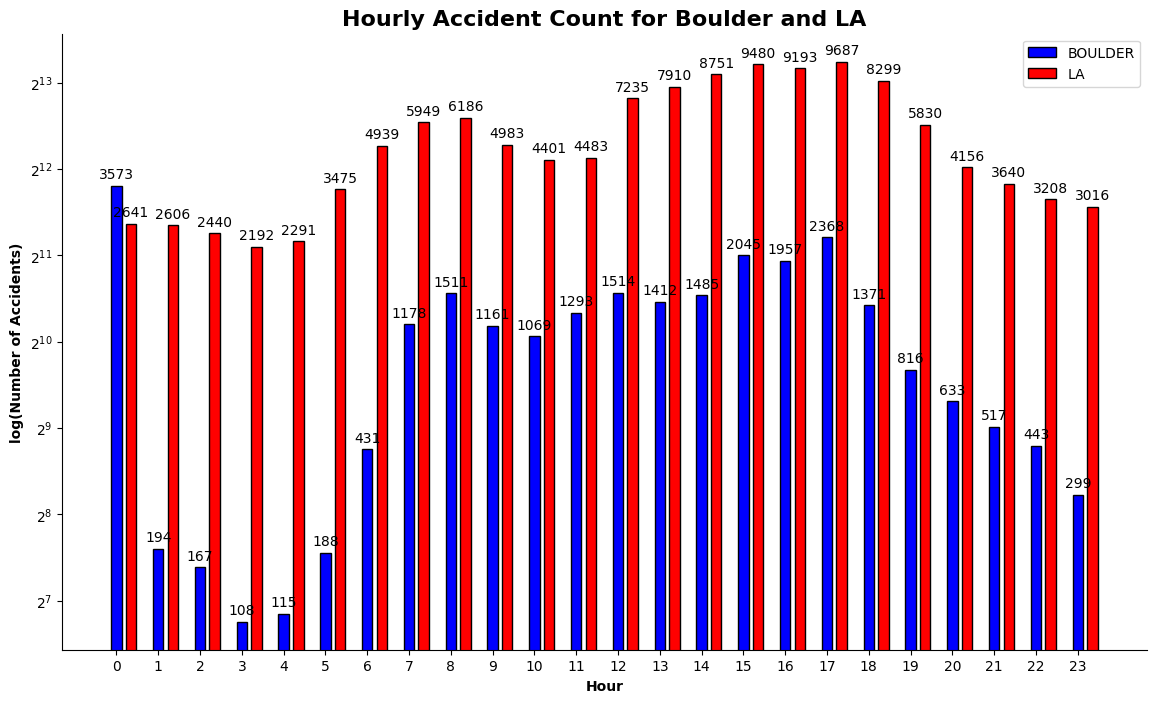

In [87]:

bars_hour_boulder = df_Boulder_hour.values
bars_hour_la = df_LA_hour.values
barWidth = 0.25
r1 = np.arange(len(bars_hour_boulder))
r2 = [x + barWidth +0.1 for x in r1]

# Make the plot
plt.rcParams["figure.figsize"]=[14, 8]
rects = plt.bar(r1, bars_hour_boulder, color='blue', width=barWidth, edgecolor='black', label='BOULDER')
rects2 = plt.bar(r2, bars_hour_la, color='red', width=barWidth, edgecolor='black', label='LA')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars_hour_boulder))],df_Boulder_hour.index.get_level_values('Hour').unique())
plt.title('Hourly Accident Count for Boulder and LA', fontsize=16, fontweight = 'bold')
# Create legend & Show graphic
plt.legend()
plt.xlabel("Hour",fontweight='bold')
plt.ylabel("log(Number of Accidents)",fontweight='bold')

plt.yscale('log',base=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)
autolabel(rects2)

plt.show()

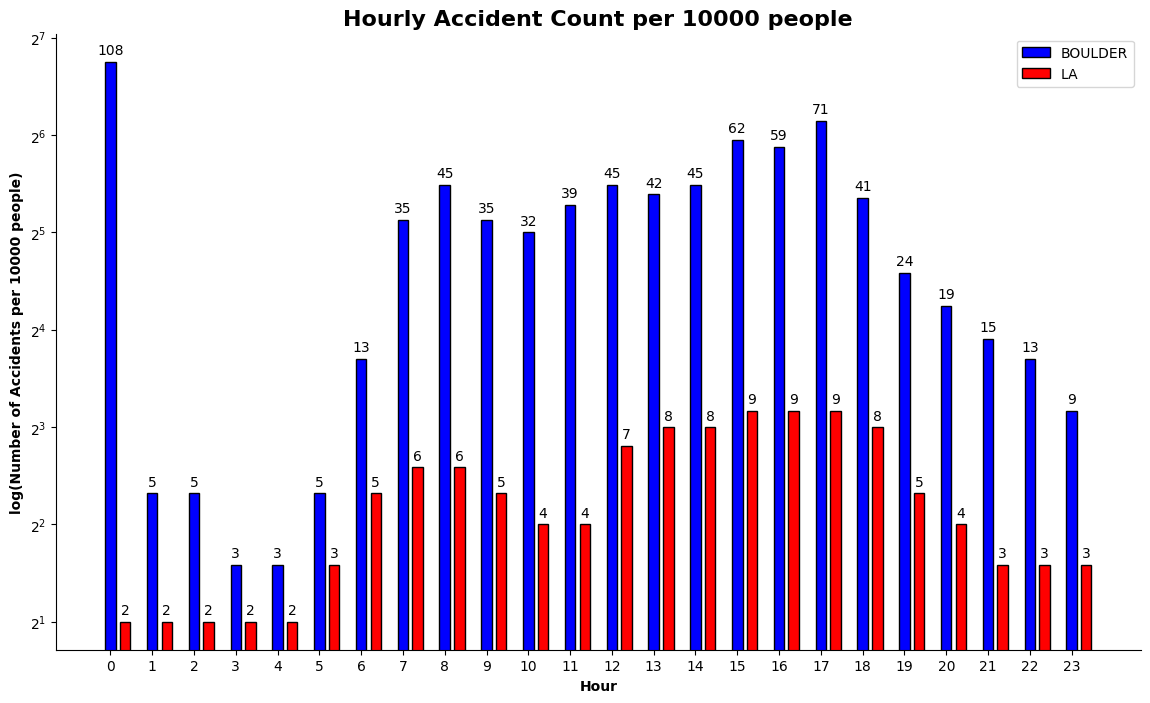

In [88]:
vector = np.vectorize(math.floor)
bars_hour_boulder = (df_Boulder_hour.values/pop_Boulder)*10000
bars_hour_la = (df_LA_hour.values/pop_LA)*10000
bars_hour_boulder = vector(bars_hour_boulder)
bars_hour_la = vector(bars_hour_la)

r1 = np.arange(len(bars_hour_boulder))
r2 = [x + barWidth +0.1 for x in r1]

# Make the plot
plt.rcParams["figure.figsize"]=[14, 8]
rects = plt.bar(r1, bars_hour_boulder, color='blue', width=barWidth, edgecolor='black', label='BOULDER')
rects2 = plt.bar(r2, bars_hour_la, color='red', width=barWidth, edgecolor='black', label='LA')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars_hour_boulder))],df_Boulder_hour.index.get_level_values('Hour').unique())
plt.title('Hourly Accident Count per 10000 people', fontsize=16, fontweight = 'bold')
# Create legend & Show graphic
plt.legend()
plt.xlabel("Hour",fontweight='bold')
plt.ylabel("log(Number of Accidents per 10000 people)",fontweight='bold')

plt.yscale('log',base=2)
autolabel(rects)
autolabel(rects2)

plt.show()

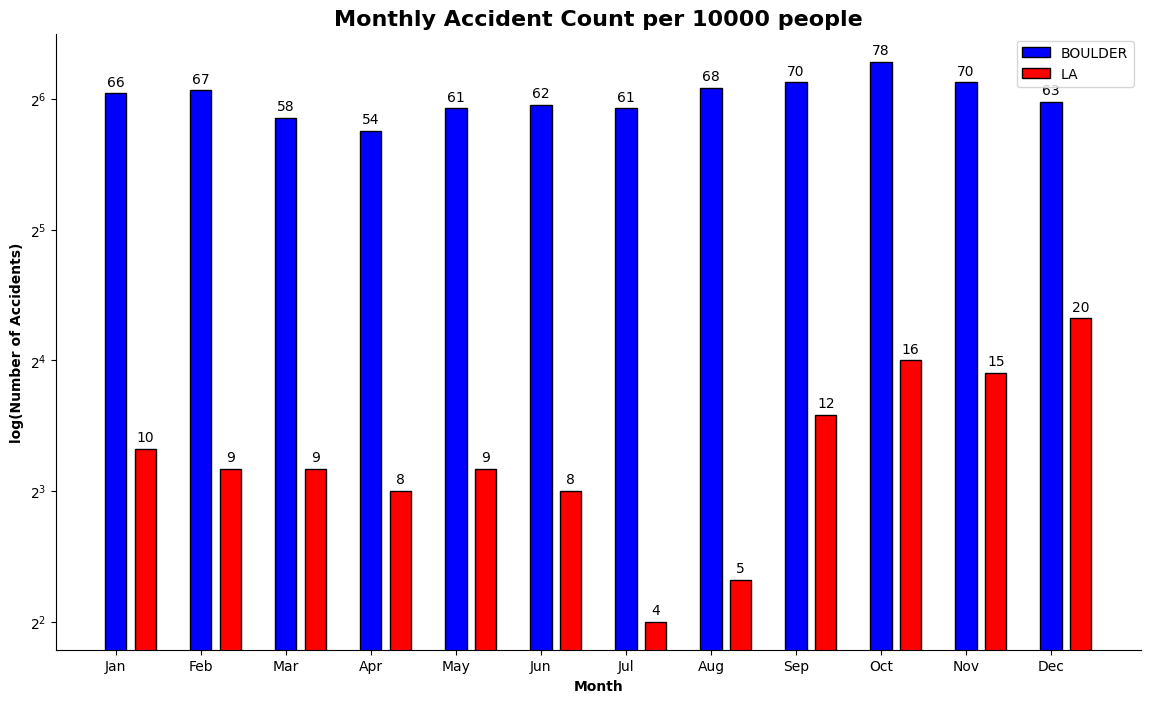

In [89]:
bars_month_boulder = (df_Boulder_month.values/pop_Boulder)*10000
bars_month_la = (df_LA_month.values/pop_LA)*10000
bars_month_boulder = vector(bars_month_boulder)
bars_month_la = vector(bars_month_la)
r1 = np.arange(len(bars_month_boulder))
r2 = [x + barWidth +0.1 for x in r1]

# Make the plot
plt.rcParams["figure.figsize"]=[14, 8]
rects = plt.bar(r1, bars_month_boulder, color='blue', width=barWidth, edgecolor='black', label='BOULDER')
rects2 = plt.bar(r2, bars_month_la, color='red', width=barWidth, edgecolor='black', label='LA')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars_month_boulder))])
plt.gca().set_xticklabels(calendar.month_abbr[r] for r in range(1,len(bars_month_boulder)+1))
plt.title('Monthly Accident Count per 10000 people', fontsize=16, fontweight = 'bold')
# Create legend & Show graphic
plt.legend()
plt.xlabel("Month",fontweight='bold')
plt.ylabel("log(Number of Accidents)",fontweight='bold')

plt.yscale('log',base=2)

autolabel(rects)
autolabel(rects2)

plt.show()

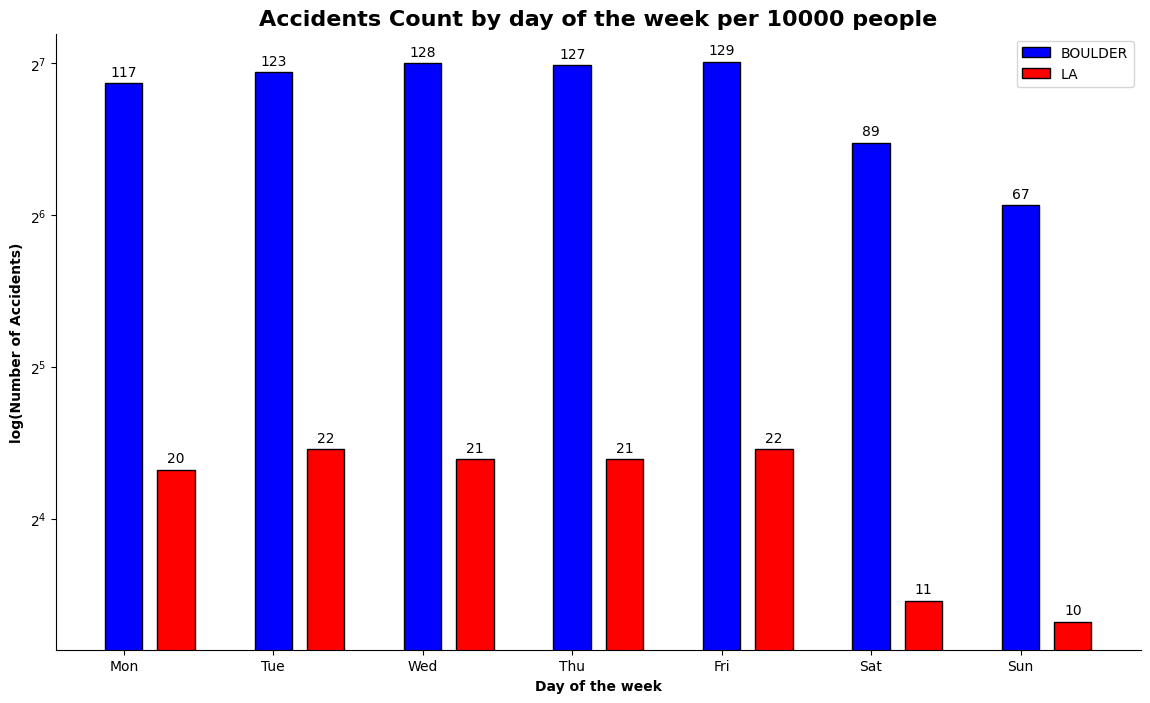

Boulder: Weekend accident % =  20.0
LA: Weekend accident % =  16.535433070866144


In [90]:
bars_weekday_boulder = (df_Boulder_weekday.values/pop_Boulder)*10000
bars_weekday_la = (df_LA_weekday.values/pop_LA)*10000
bars_weekday_boulder = vector(bars_weekday_boulder)
bars_weekday_la = vector(bars_weekday_la)
r1 = np.arange(len(bars_weekday_boulder))
r2 = [x + barWidth +0.1 for x in r1]

# Make the plot
plt.rcParams["figure.figsize"]=[14, 8]
rects = plt.bar(r1, bars_weekday_boulder, color='blue', width=barWidth, edgecolor='black', label='BOULDER')
rects2 = plt.bar(r2, bars_weekday_la, color='red', width=barWidth, edgecolor='black', label='LA')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars_weekday_boulder))])
plt.gca().set_xticklabels(calendar.day_abbr[r] for r in range(0,len(bars_weekday_boulder)))
plt.title('Accidents Count by day of the week per 10000 people', fontsize=16, fontweight = 'bold')
# Create legend & Show graphic
plt.legend()
plt.xlabel("Day of the week",fontweight='bold')
plt.ylabel("log(Number of Accidents)",fontweight='bold')

plt.yscale('log',base=2)

autolabel(rects)
autolabel(rects2)

plt.show()

print("Boulder: Weekend accident % = ",100/np.sum(bars_weekday_boulder)*(rects[5].get_height()+rects[6].get_height()))
print("LA: Weekend accident % = ",100/np.sum(bars_weekday_la)*(rects2[5].get_height()+rects2[6].get_height()))

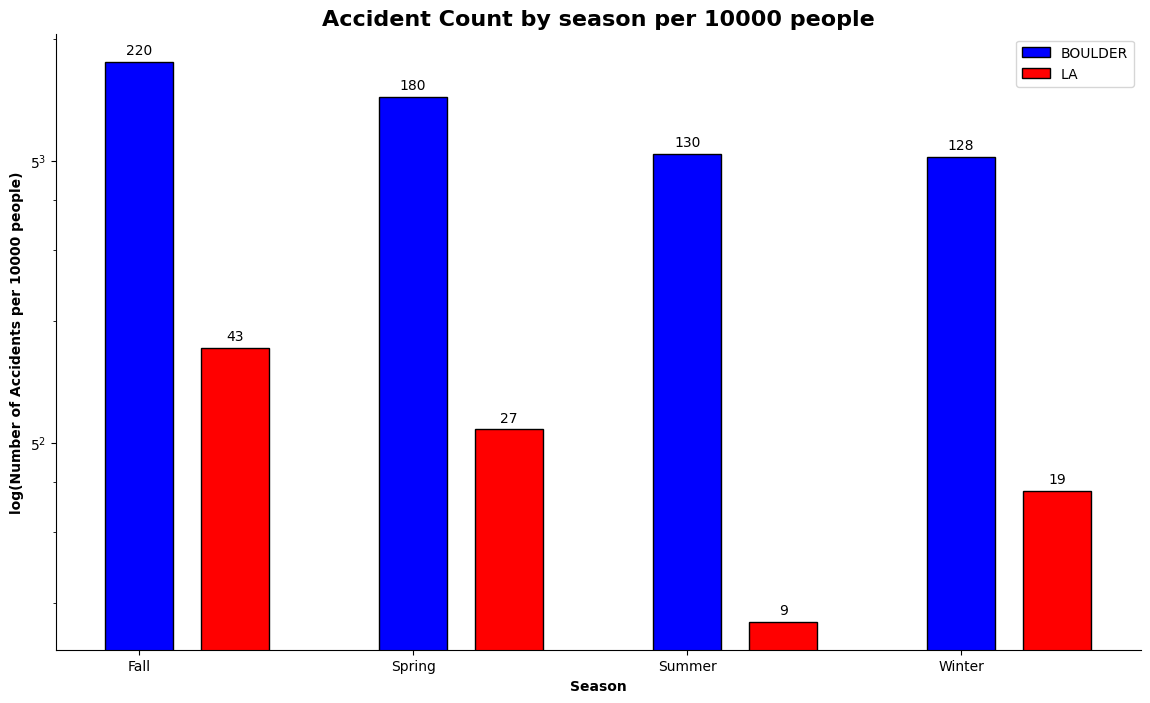

In [91]:
vector = np.vectorize(math.floor)
bars_season_boulder = (df_Boulder_season.values/pop_Boulder)*10000
bars_season_la = (df_LA_season.values/pop_LA)*10000
bars_season_boulder = vector(bars_season_boulder)
bars_season_la = vector(bars_season_la)

r1 = np.arange(len(bars_season_boulder))
r2 = [x + barWidth +0.1 for x in r1]

# Make the plot
plt.rcParams["figure.figsize"]=[14, 8]
rects = plt.bar(r1, bars_season_boulder, color='blue', width=barWidth, edgecolor='black', label='BOULDER')
rects2 = plt.bar(r2, bars_season_la, color='red', width=barWidth, edgecolor='black', label='LA')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars_season_boulder))],df_Boulder_season.index.get_level_values('Season').unique())
plt.title('Accident Count by season per 10000 people', fontsize=16, fontweight = 'bold')
# Create legend & Show graphic
plt.legend()
plt.xlabel("Season",fontweight='bold')
plt.ylabel("log(Number of Accidents per 10000 people)",fontweight='bold')

plt.yscale('log',base=5)
autolabel(rects)
autolabel(rects2)

plt.show()

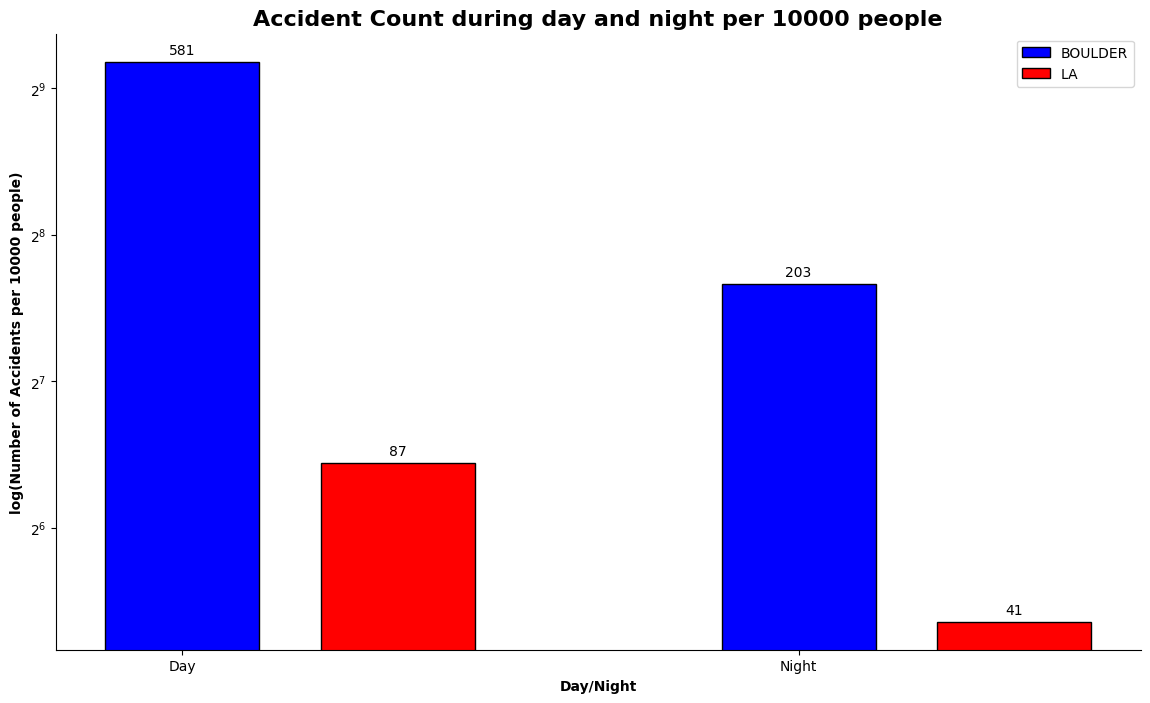

Boulder: Day accident rate =  74.10714285714286  Night accident rate =  25.892857142857142
LA: Day accident rate =  67.96875  Night accident rate =  32.03125


In [92]:
vector = np.vectorize(math.floor)
bars_daynight_boulder = (df_Boulder_daynight.values/pop_Boulder)*10000
bars_daynight_la = (df_LA_daynight.values/pop_LA)*10000
bars_daynight_boulder = vector(bars_daynight_boulder)
bars_daynight_la = vector(bars_daynight_la)

r1 = np.arange(len(bars_daynight_boulder))
r2 = [x + barWidth +0.1 for x in r1]

# Make the plot
plt.rcParams["figure.figsize"]=[14, 8]
rects = plt.bar(r1, bars_daynight_boulder, color='blue', width=barWidth, edgecolor='black', label='BOULDER')
rects2 = plt.bar(r2, bars_daynight_la, color='red', width=barWidth, edgecolor='black', label='LA')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars_daynight_boulder))],df_Boulder_daynight.index.get_level_values('Day_Night').unique())
plt.title('Accident Count during day and night per 10000 people', fontsize=16, fontweight = 'bold')
# Create legend & Show graphic
plt.legend()
plt.xlabel("Day/Night",fontweight='bold')
plt.ylabel("log(Number of Accidents per 10000 people)",fontweight='bold')

plt.yscale('log',base=2)
autolabel(rects)
autolabel(rects2)

plt.show()

print("Boulder: Day accident rate = ",100/np.sum(bars_daynight_boulder)*(rects[0].get_height())," Night accident rate = ",100/np.sum(bars_daynight_boulder)*(rects[1].get_height()))
print("LA: Day accident rate = ",100/np.sum(bars_daynight_la)*(rects2[0].get_height())," Night accident rate = ",100/np.sum(bars_daynight_la)*(rects2[1].get_height()))

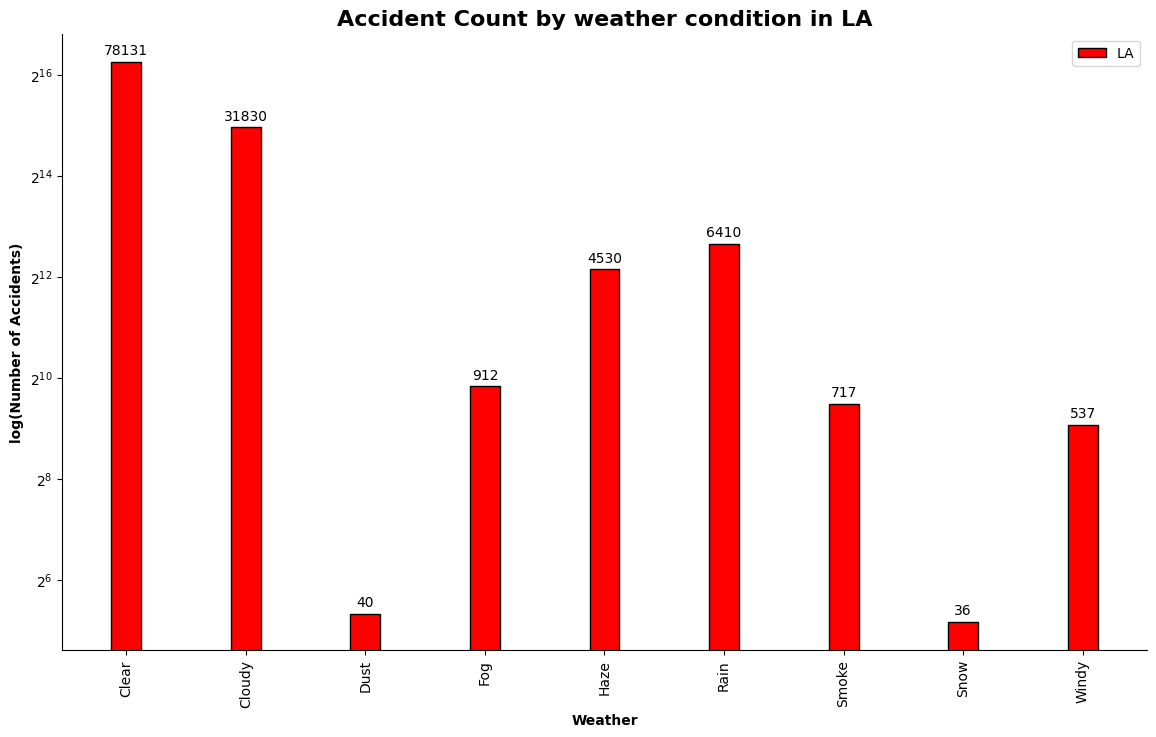

Rectangle(xy=(-0.125, 0), width=0.25, height=78131, angle=0) -> 63.45 %
Rectangle(xy=(0.875, 0), width=0.25, height=31830, angle=0) -> 25.85 %
Rectangle(xy=(1.875, 0), width=0.25, height=40, angle=0) -> 0.03 %
Rectangle(xy=(2.875, 0), width=0.25, height=912, angle=0) -> 0.74 %
Rectangle(xy=(3.875, 0), width=0.25, height=4530, angle=0) -> 3.68 %
Rectangle(xy=(4.875, 0), width=0.25, height=6410, angle=0) -> 5.21 %
Rectangle(xy=(5.875, 0), width=0.25, height=717, angle=0) -> 0.58 %
Rectangle(xy=(6.875, 0), width=0.25, height=36, angle=0) -> 0.03 %
Rectangle(xy=(7.875, 0), width=0.25, height=537, angle=0) -> 0.44 %


In [93]:
df_LA.loc[((df_LA['Weather_Condition']=="Blowing Dust / Windy")|(df_LA['Weather_Condition']=="Blowing Dust") | (df_LA['Weather_Condition']=="Widespread Dust") ),"Weather_Condition"]="Dust"
df_LA.loc[((df_LA['Weather_Condition']=="Fair") |(df_LA['Weather_Condition']=="Clear")),"Weather_Condition"]="Clear"
df_LA.loc[((df_LA['Weather_Condition']=="Fair / Windy") |(df_LA['Weather_Condition']=="Cloudy / Windy") |(df_LA['Weather_Condition']=="Partly Cloudy / Windy") |(df_LA['Weather_Condition']=="Mostly Cloudy / Windy")),"Weather_Condition"]="Windy"
df_LA.loc[((df_LA['Weather_Condition']=="Mostly Cloudy") |(df_LA['Weather_Condition']=="Partly Cloudy") |(df_LA['Weather_Condition']=="Overcast") |(df_LA['Weather_Condition']=="Scattered Clouds")),"Weather_Condition"]="Cloudy"
df_LA.loc[((df_LA['Weather_Condition']=="Light Snow / Windy") |(df_LA['Weather_Condition']=="Heavy Snow") |(df_LA['Weather_Condition']=="Light Snow") |(df_LA['Weather_Condition']=="Snow / Windy")),"Weather_Condition"]="Snow"
df_LA.loc[((df_LA['Weather_Condition']=="Drizzle") |(df_LA['Weather_Condition']=="Hail") |(df_LA['Weather_Condition']=="Heavy Rain") |(df_LA['Weather_Condition']=="Heavy Rain / Windy") |(df_LA['Weather_Condition']=="Heavy T-Storm") |(df_LA['Weather_Condition']=="Heavy Thunderstorms and Rain") |(df_LA['Weather_Condition']=="Rain / Windy") |(df_LA['Weather_Condition']=="Rain Shower") |(df_LA['Weather_Condition']=="Rain Showers") |(df_LA['Weather_Condition']=="T-Storm") |(df_LA['Weather_Condition']=="Thunder") |(df_LA['Weather_Condition']=="Thunder in the Vicinity") |(df_LA['Weather_Condition']=="Thunderstorm") |(df_LA['Weather_Condition']=="Thunderstorms and Rain")
           |(df_LA['Weather_Condition']=="Light Rain / Windy") |(df_LA['Weather_Condition']=="Light Rain Shower") |(df_LA['Weather_Condition']=="Light Rain Showers") |(df_LA['Weather_Condition']=="Light Rain and Thunder") |(df_LA['Weather_Condition']=="Light Thunderstorms and Rain")|(df_LA['Weather_Condition']=="Light Rain")|(df_LA['Weather_Condition']=="Light Drizzle")|(df_LA['Weather_Condition']=="Light Rain with Thunder")|(df_LA['Weather_Condition']=="Showers in the Vicinity")),"Weather_Condition"]="Rain"
df_LA.loc[((df_LA['Weather_Condition']=="Patches of Fog") |(df_LA['Weather_Condition']=="Fog / Windy") |(df_LA['Weather_Condition']=="Shallow Fog") |(df_LA['Weather_Condition']=="Mist") ),"Weather_Condition"]="Fog"
df_LA.loc[(df_LA['Weather_Condition']=="Haze / Windy") ,"Weather_Condition"]="Haze"
df_LA.loc[(df_LA['Weather_Condition']=="Smoke / Windy") ,"Weather_Condition"]="Smoke"


df_LA_weather = df_LA.groupby(["Weather_Condition"]).size()
bars = df_LA_weather.values
r1 = np.arange(len(bars))
rects = plt.bar(r1,bars,color='red',width=barWidth,edgecolor='black', label='LA')
plt.xticks([r for r in range(len(bars))],df_LA_weather.index.get_level_values('Weather_Condition').unique(),rotation=90)
plt.title('Accident Count by weather condition in LA', fontsize=16, fontweight = 'bold')

plt.legend()
plt.xlabel("Weather",fontweight='bold')
plt.ylabel("log(Number of Accidents)",fontweight='bold')

plt.yscale('log',base=2)

autolabel(rects)

plt.show()

for rect in rects:
    percentage = round(rect.get_height() / np.sum(bars) * 100, 2)
    print(rect, "->", percentage, "%")

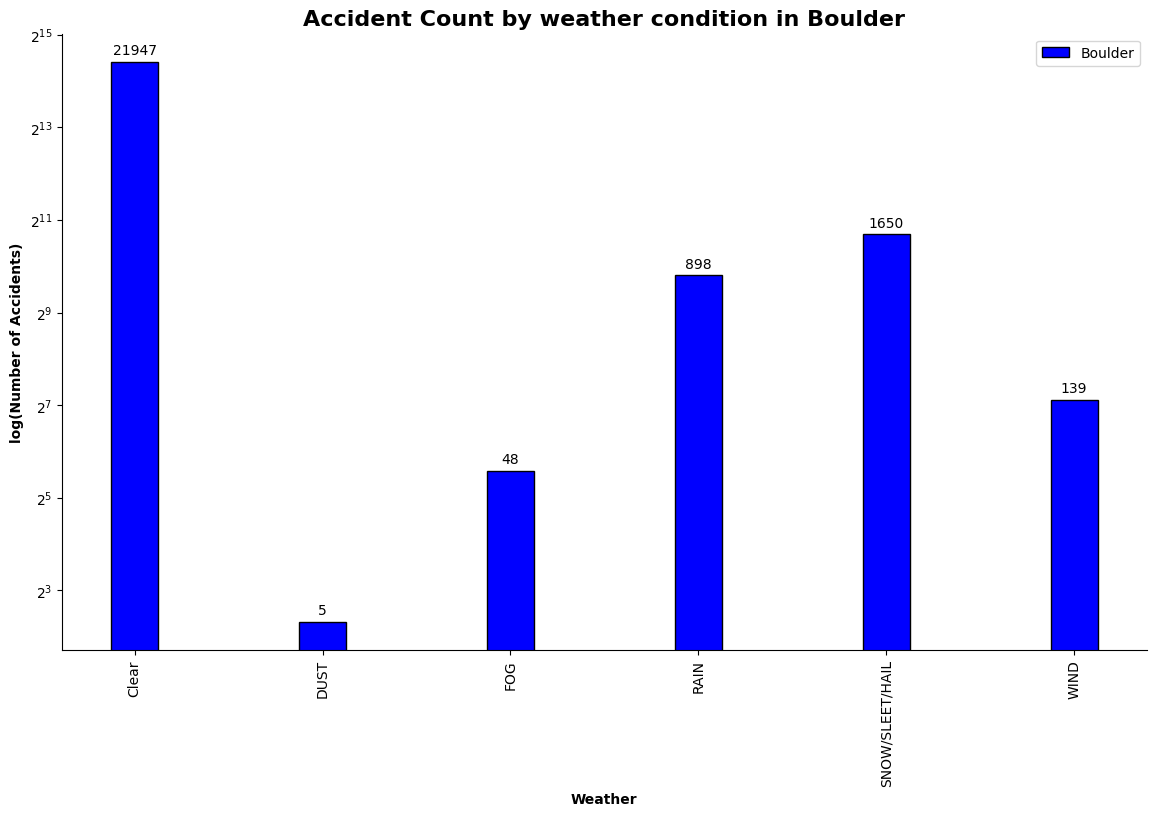

Rectangle(xy=(-0.125, 0), width=0.25, height=21947, angle=0) -> 88.9 %
Rectangle(xy=(0.875, 0), width=0.25, height=5, angle=0) -> 0.02 %
Rectangle(xy=(1.875, 0), width=0.25, height=48, angle=0) -> 0.19 %
Rectangle(xy=(2.875, 0), width=0.25, height=898, angle=0) -> 3.64 %
Rectangle(xy=(3.875, 0), width=0.25, height=1650, angle=0) -> 6.68 %
Rectangle(xy=(4.875, 0), width=0.25, height=139, angle=0) -> 0.56 %


In [94]:
df_Boulder.loc[(df_Boulder['weather']=="NONE") ,"weather"]="Clear"

mask = (df_Boulder['weather']!="UNKNOWN")
df_new = df_Boulder.loc[mask]
df_Boulder_weather = df_new.groupby(["weather"]).size()
bars = df_Boulder_weather.values
r1 = np.arange(len(bars))
rects = plt.bar(r1,bars,color='blue',width=barWidth,edgecolor='black', label='Boulder')
plt.xticks([r for r in range(len(bars))],df_Boulder_weather.index.get_level_values('weather').unique(),rotation=90)
plt.title('Accident Count by weather condition in Boulder', fontsize=16, fontweight = 'bold')

plt.legend()
plt.xlabel("Weather",fontweight='bold')
plt.ylabel("log(Number of Accidents)",fontweight='bold')

plt.yscale('log',base=2)

autolabel(rects)

plt.show()

for rect in rects:
    percentage = round(rect.get_height() / np.sum(bars) * 100, 2)
    print(rect, "->", percentage, "%")

In [95]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
# import shap

rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# prepare input data
def prepare_inputs(X_train, X_test):
 oe = OrdinalEncoder()
 oe.fit(X_train)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc


# prepare target
def prepare_targets(y_train):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 return y_train_enc

df_Boulder_filtered = df_Boulder[["system","Hour","city","latitude","longitude","Intersection_Id","location","road_desc","contour","condition","lighting","weather","limit1","acctype","vehicle_1","driver_1","Corridor_1","severity"]]
X = df_Boulder_filtered.drop('severity', axis=1)
y = df_Boulder_filtered['severity']
X = X.astype(str)
y = y.astype(str)
df = pd.DataFrame()
for i in range(len(X.columns)):
    tmp = X.iloc[:,[i]]
    df = pd.concat([
    df,pd.DataFrame(prepare_targets(tmp),columns=[X.columns[i]])], axis=1)
    
X = df

df = pd.DataFrame()
df = pd.concat([df,pd.DataFrame(prepare_targets(y),columns=['severity'])], axis=1)
y = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)


print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")




/Users/lakshmishreec/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lakshmishreec/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lakshmishreec/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lakshmishreec/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:

RF train accuracy: 0.867


Text(0.5, 0, 'Random Forest Feature Importance for Boulder County data')

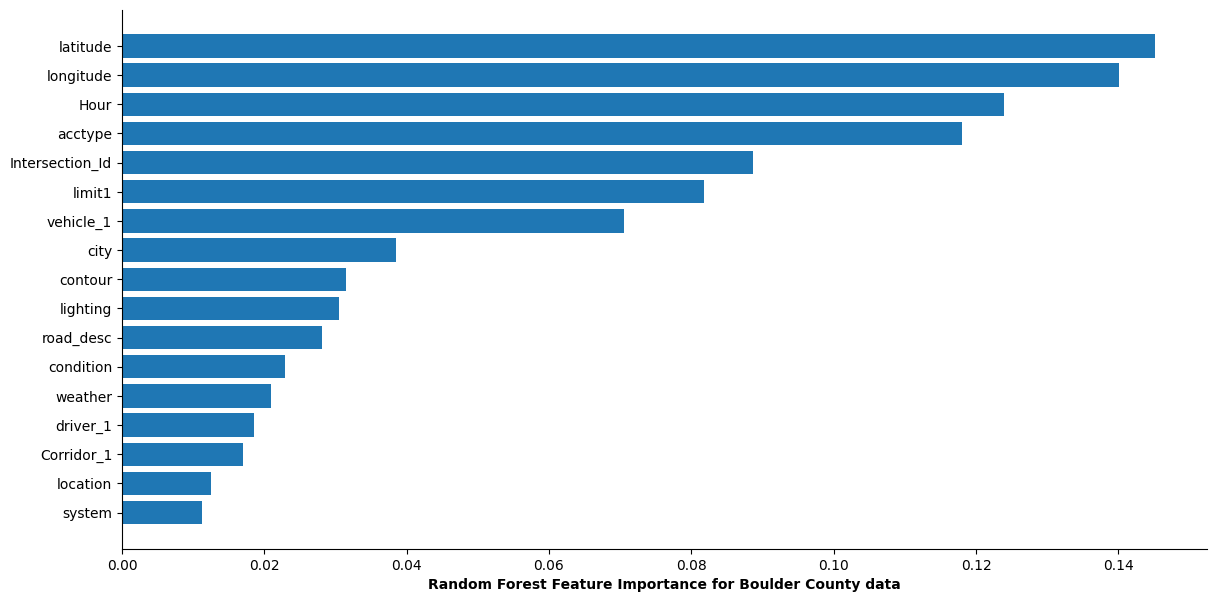

In [64]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance for Boulder County data",fontweight='bold')

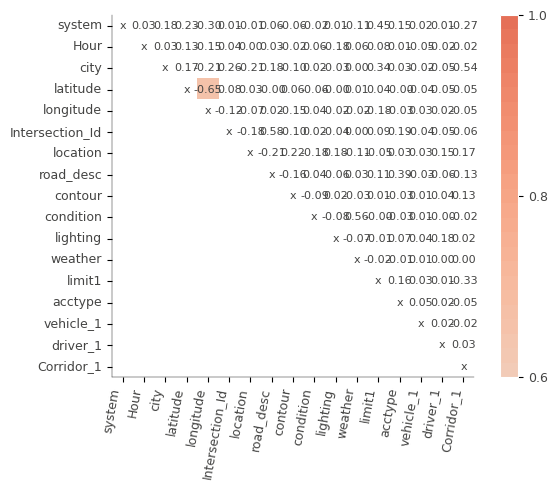

In [83]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(7,5))
viz.view()

In [96]:
df_LA_filtered = df_LA[["Temperature(F)","Hour","City","Start_Lat","Start_Lng","Humidity(%)","Pressure(in)","Visibility(mi)","Weather_Condition","Junction","Sunrise_Sunset","Traffic_Signal","Crossing","Severity"]]
X = df_LA_filtered.drop('Severity', axis=1)
y = df_LA_filtered['Severity']
X = X.astype(str)
y = y.astype(str)
df = pd.DataFrame()
for i in range(len(X.columns)):
    tmp = X.iloc[:,[i]]
    df = pd.concat([
    df,pd.DataFrame(prepare_targets(tmp),columns=[X.columns[i]])], axis=1)
    
X = df

df = pd.DataFrame()
df = pd.concat([df,pd.DataFrame(prepare_targets(y),columns=['Severity'])], axis=1)
y = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")

/Users/lakshmishreec/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lakshmishreec/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lakshmishreec/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lakshmishreec/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:

RF train accuracy: 0.883


Text(0.5, 0, 'Random Forest Feature Importance for LA County data')

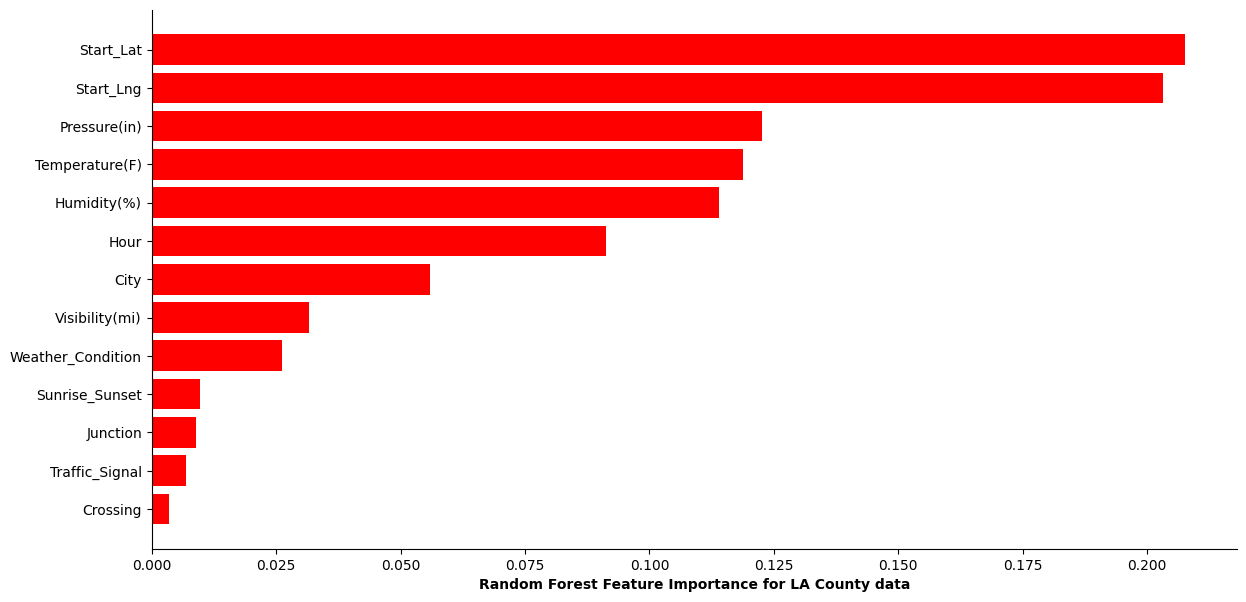

In [76]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx],color='red')
plt.xlabel("Random Forest Feature Importance for LA County data",fontweight='bold')